## FinTech 545 - Project Week 02

## Renjie Wang

## Problem 1

a.

In [1]:
import pandas as pd
import numpy as np

print('The following four moments are calculated with the formula:\n')

# Calculate the first four moments with normalized formula.

# 1st moment
df_1 = pd.read_csv("problem1.csv")
n = df_1.size
mu_1 = 1 / n * df_1['x'].sum()
print(f'The normalized first moment is {float(mu_1)}.')

# 2nd moment
df_1['centered'] = df_1['x'] - float(mu_1)
df_1['centered squared'] = df_1['centered'] ** 2
biased_var = 1 / n * (df_1['centered squared'].sum())
mu_2 = 1 / (n - 1) * (df_1['centered squared'].sum())
print(f'The normalized second moment is {float(mu_2)}.')

# 3rd moment
df_1['centered 3rd power'] = df_1['centered'] ** 3
unnormalized_mu_3 = 1 / n * (df_1['centered 3rd power'].sum()) 
mu_3 = unnormalized_mu_3 / biased_var ** (3 / 2)
print(f'The normalized thrid moment is {float(mu_3)}.')

# 4th moment
df_1['centered 4th power'] = df_1['centered'] ** 4
kurtosis = 1 / n * (df_1['centered 4th power'].sum()) / (biased_var ** 2)
mu_4 = kurtosis - 3
print(f'The normalized fourth moment is {float(mu_4)}.')

The following four moments are calculated with the formula:

The normalized first moment is 1.0489703904839585.
The normalized second moment is 5.427220681881727.
The normalized thrid moment is 0.8806086425277361.
The normalized fourth moment is 23.122200789989723.


b.

In [2]:
from scipy.stats import skew, kurtosis

print('The following four moments are calculated with statistical package:\n')

# Calculate the first four moments with statistical package.

# 1st moment
mu_1_package = np.mean(df_1['x'])
print(f'The normalized first moment is {mu_1_package}.')

# 2nd moment
mu_2_package = np.var(df_1['x'])
print(f'The normalized first moment is {mu_2_package}.')

# 3rd moment
mu_3_package = skew(df_1['x'])
print(f'The normalized first moment is {mu_3_package}.')

# 4th moment
mu_4_package = kurtosis(df_1['x'])
print(f'The normalized first moment is {mu_4_package}.')

The following four moments are calculated with statistical package:

The normalized first moment is 1.0489703904839582.
The normalized first moment is 5.421793461199844.
The normalized first moment is 0.8806086425277364.
The normalized first moment is 23.122200789989723.


c.

In [3]:
import math
from scipy.stats import t

# Generate 100 realizations of standard normal r.v.
sample_len = 100
def generate_standard_normal():
    mu, sigma = 0, 1
    realizations = np.random.normal(mu, sigma, sample_len)
    return realizations

# Create a list to hold the result from multiple simulations.
simulation = 1000
mean_lst, variance_lst, skewness_lst, kurtosis_lst = [], [], [], []

# Hold the data for t-test
for i in range(simulation):
    sample = generate_standard_normal()
    mean_lst.append(np.mean(sample))
    variance_lst.append(np.var(sample))
    skewness_lst.append(skew(sample))
    kurtosis_lst.append(kurtosis(sample))

"""
The null hypothesis for the first fourth moment (standard normal) should be:
H0: mu = 0
H0: var = 1
H0: skewness = 0
H0: kurtosis = 0
"""

# Test if statistical package functions are biased
def ttest(data_lst, d):
    mean = np.mean(data_lst)
    sigma = math.sqrt(np.var(data_lst))
    
    # Calculate the t-statistic and p-value.
    t_stat = (mean - d) / (sigma / math.sqrt(simulation))
    p = 2 * (1 - t.cdf(abs(t_stat), simulation - 1))
    return t_stat, p

# Calculate relating statistics for t-test.
mu_stat = ttest(mean_lst, 0)
var_stat = ttest(variance_lst, 1)
skew_stat = ttest(skewness_lst, 0)
kurtosis_stat = ttest(kurtosis_lst, 0)

print(f'The t-statistic for mu is {mu_stat[0]}, and the p-value is {mu_stat[1]}')
print(f'The t-statistic for variance is {var_stat[0]}, and the p-value is {var_stat[1]}')
print(f'The t-statistic for skewness is {skew_stat[0]}, and the p-value is {skew_stat[1]}')
print(f'The t-statistic for kurtosis is {kurtosis_stat[0]}, and the p-value is {kurtosis_stat[1]}')

The t-statistic for mu is -0.31341335061169395, and the p-value is 0.7540320663109945
The t-statistic for variance is -2.487063837271974, and the p-value is 0.013042529738835018
The t-statistic for skewness is 0.3353542098756573, and the p-value is 0.737428313416232
The t-statistic for kurtosis is -3.161345404149764, and the p-value is 0.0016177187199979404


## Problem 2

a.

In [4]:
# Read the data.
df = pd.read_csv('problem2.csv')

# Create relating matrix to apply the formula of OLS.
df['1'] = 1
X = df[['1', 'x']]
Y = df['y']
n = X.shape[0]
X_transpose = X.T
XTX = X_transpose.dot(X)
XTX_inverse = np.linalg.inv(XTX)
XTY = X_transpose.dot(Y)
beta_OLS = XTX_inverse.dot(XTY)

# Calculate the sigma for the error.
s2 = (Y - X.dot(beta_OLS)).T.dot(Y - X.dot(beta_OLS)) / (n - 2)
print(f"Using OLS, beta_0: {beta_OLS[0]}, beta_1: {beta_OLS[1]}, sigma: {math.sqrt(s2)}")

Using OLS, beta_0: -0.08738446427005075, beta_1: 0.7752740987226113, sigma: 1.008813058320225


In [5]:
from scipy.optimize import minimize

# The objective negative log-likelihood function (need to be minimized).
def ll(params):
    *beta_MLE, sigma2 = params
    
    n = X.shape[0]
    epsilon = Y - X.dot(beta_MLE)
    ll = - n / 2 * math.log(sigma2 * 2 * math.pi) - 1 / (2 * sigma2) * epsilon.T.dot(epsilon)
    return -ll

# Set intial beta and sigma2 value.
beta = np.ones(2)
s2 = 1
initial = np.append(beta, s2)

# Minimizing the objective function
res = minimize(ll, initial, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
beta_normal = res.x[0:2]
print(f"Using MLE given the assumption of normality, beta_0: {res.x[0]}, beta_1: {res.x[1]}, sigma: {math.sqrt(res.x[2])}")

Optimization terminated successfully.
         Current function value: 284.537563
         Iterations: 135
         Function evaluations: 242
Using MLE given the assumption of normality, beta_0: -0.0873844853244749, beta_1: 0.7752740941114873, sigma: 1.003756325540931


b.

In [6]:
# The objective negative log-likelihood function (need to be minimized).
def ll_t(params):
    beta_MLE_t = params[:-2]
    sigma_t = params[-2]
    dof = params[-1]
    
    n = X.shape[0]
    epsilon = Y - X.dot(beta_MLE_t)
    ll_t = np.sum(t.logpdf(epsilon, df=dof, loc=0, scale=sigma_t))
    return -ll_t

# Set intial beta, sigma2, dof value.
beta = np.ones(2)
s = 1
dof = 100
initial = np.append(beta, [s, dof])

# Minimizing the objective function
res = minimize(ll_t, initial, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
beta_t = res.x[0:2]
print(f"Using MLE given the assumption of a T distribution of errors, beta_0: {res.x[0]}, beta_1: {res.x[1]}, sigma: {res.x[2]}")

Optimization terminated successfully.
         Current function value: 281.293403
         Iterations: 440
         Function evaluations: 762
Using MLE given the assumption of a T distribution of errors, beta_0: -0.09726940804444521, beta_1: 0.6750091374365643, sigma: 0.8551037449249874


In [7]:
# The adjusted R2 function.
def adjusted_R2(Y, X, beta):
    epsilon = Y - X.dot(beta)
    ESS = epsilon.T.dot(epsilon)
    TSS = (Y - Y.mean()).T.dot(Y - Y.mean())
    
    k = len(beta)
    adjusted_R2 = 1 - ESS / TSS * ((n - 1) / (n - k))
    return adjusted_R2

# Compare the adjusted R2 to determine the better fit.
adjusted_R2_normal = adjusted_R2(Y, X, beta_normal)
adjusted_R2_t = adjusted_R2(Y, X, beta_t)

print(f"The adjusted square for assumption of normality is {adjusted_R2_normal}.")
print(f"The adjusted square for assumption of T distribution is {adjusted_R2_t}.")

The adjusted square for assumption of normality is 0.34230186782524086.
The adjusted square for assumption of T distribution is 0.3363196253889599.


c.

In [8]:
# Read the data.
df1 = pd.read_csv('problem2_x.csv')
df2 = pd.read_csv('problem2_x1.csv')

# Calculate the mean and the covariance matrix.
mean = df1.mean(axis=0)
cov = np.cov(df1, rowvar=False)

# Break down the elements and store them in separate variables.
mu_1, mu_2 = mean
cov_11, cov_12, cov_21, cov_22 = cov.flatten()

# Given X1, the parameters of X2 distribution are as following:
x1_observed = df2['x1']
mu_bar = mu_2 + cov_21 * (1 / cov_11) * (x1_observed - mu_1)
cov_bar = cov_22 - cov_21 * (1 / cov_11) * cov_21

# Output the parameters for the distribution.
print(f'The conditional mean are as following:\n{mu_bar}\n')
print(f'The conditional variance is {cov_bar}.')

The conditional mean are as following:
0     0.592912
1     1.211941
2     1.582989
3     1.133166
4     1.056346
        ...   
95    1.772319
96    0.480611
97    0.958081
98    1.584177
99    0.705882
Name: x1, Length: 100, dtype: float64

The conditional variance is 0.6982158881639966.


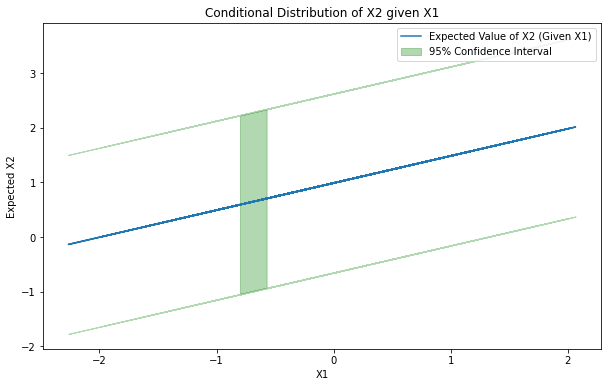

In [9]:
import matplotlib.pyplot as plt

# Calculate the 95% confidence interval
CI = 1.96 * math.sqrt(cov_bar)

# Calculate the lower bound and upper bound for the confidence interval.
lower_bound = mu_bar - CI
upper_bound = mu_bar + CI

# Plot the expected value along with 95% confidence interval
plt.figure(figsize=(10, 6))
plt.plot(x1_observed, mu_bar, label='Expected Value of X2 (Given X1)')
plt.fill_between(x1_observed, lower_bound, upper_bound, color='green', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('X1')
plt.ylabel('Expected X2')
plt.title('Conditional Distribution of X2 given X1')
plt.legend()
plt.show()

## Problem 3

In [10]:
# Read the data from the csv file.
df = pd.read_csv("problem3.csv")
df

,x
0,0.707768
1,2.630275
2,2.847105
3,1.349367
4,0.319027
...,...
495,3.765856
496,1.343147
497,0.133375
498,1.787300


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

# The AR(1) model.
model_AR1 = SARIMAX(df['x'],  
                order = (1, 0, 0)) 
  
AR1 = model_AR1.fit()
AR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -919.096
Date:                Sat, 27 Jan 2024   AIC                           1842.192
Time:                        04:44:28   BIC                           1850.621
Sample:                             0   HQIC                          1845.499
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7888      0.029     27.234      0.000       0.732       0.846
sigma2         2.3084      0.152     15.178      0.000       2.010       2.607
===================================================================================
Ljung-Box (L1) (Q):                  15.12   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.00   Prob(JB):                         0.79
Heteroskedasticity (H):               1.54   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# The AR(2) model.
model_AR2 = SARIMAX(df['x'],  
                order = (2, 0, 0)) 
  
AR2 = model_AR2.fit() 
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -917.017
Date:                Sat, 27 Jan 2024   AIC                           1840.033
Time:                        04:44:28   BIC                           1852.677
Sample:                             0   HQIC                          1844.995
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7168      0.042     16.914      0.000       0.634       0.800
ar.L2          0.0911      0.045      2.007      0.045       0.002       0.180
sigma2         2.2892      0.151     15.201      0.000       1.994       2.584
===================================================================================
Ljung-Box (L1) (Q):                  10.82   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.00   Prob(JB):                         0.72
Heteroskedasticity (H):               1.54   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# The AR(3) model.
model_AR3 = SARIMAX(df['x'],  
                order = (3, 0, 0)) 
  
AR3 = model_AR3.fit() 
AR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -745.228
Date:                Sat, 27 Jan 2024   AIC                           1498.456
Time:                        04:44:28   BIC                           1515.314
Sample:                             0   HQIC                          1505.071
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6517      0.032     20.581      0.000       0.590       0.714
ar.L2         -0.4145      0.038    -11.048      0.000      -0.488      -0.341
ar.L3          0.7048      0.032     21.836      0.000       0.642       0.768
sigma2         1.1468      0.074     15.504      0.000       1.002       1.292
===================================================================================
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.05   Prob(JB):                         0.79
Heteroskedasticity (H):               1.05   Skew:                             0.06
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# The MA(1) model.
model_MA1 = SARIMAX(df['x'],  
                order = (0, 0, 1)) 
  
MA1 = model_MA1.fit() 
MA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -968.996
Date:                Sat, 27 Jan 2024   AIC                           1941.992
Time:                        04:44:28   BIC                           1950.421
Sample:                             0   HQIC                          1945.300
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7923      0.030     26.383      0.000       0.733       0.851
sigma2         2.8183      0.212     13.285      0.000       2.402       3.234
===================================================================================
Ljung-Box (L1) (Q):                  46.54   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               1.25   Skew:                             0.04
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# The MA(2) model.
model_MA2 = SARIMAX(df['x'],  
                order = (0, 0, 2)) 
  
MA2 = model_MA2.fit() 
MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -928.777
Date:                Sat, 27 Jan 2024   AIC                           1863.553
Time:                        04:44:29   BIC                           1876.197
Sample:                             0   HQIC                          1868.515
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.1127      0.044     25.024      0.000       1.026       1.200
ma.L2          0.3946      0.043      9.128      0.000       0.310       0.479
sigma2         2.3977      0.160     14.962      0.000       2.084       2.712
===================================================================================
Ljung-Box (L1) (Q):                  86.48   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.00   Prob(JB):                         0.86
Heteroskedasticity (H):               1.27   Skew:                             0.05
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# The MA(3) model.
model_MA3 = SARIMAX(df['x'],  
                order = (0, 0, 3)) 
  
MA3 = model_MA3.fit() 
MA3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  500
Model:               SARIMAX(0, 0, 3)   Log Likelihood                -928.700
Date:                Sat, 27 Jan 2024   AIC                           1865.401
Time:                        04:44:29   BIC                           1882.259
Sample:                             0   HQIC                          1872.016
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.1097      0.053     21.000      0.000       1.006       1.213
ma.L2          0.4013      0.076      5.299      0.000       0.253       0.550
ma.L3          0.0144      0.050      0.287      0.774      -0.084       0.113
sigma2         2.3971      0.162     14.752      0.000       2.079       2.716
===================================================================================
Ljung-Box (L1) (Q):                  84.54   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.00   Prob(JB):                         0.88
Heteroskedasticity (H):               1.29   Skew:                             0.05
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""